In [1]:
import pandas as pd
import import_ipynb
import covid_dict as cd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

importing Jupyter notebook from covid_dict.ipynb


In [2]:
df = pd.read_csv('input_datasets/20201030_death_matrix.csv', header=None)

In [3]:
dic = cd.covid_dict

In [4]:
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

In [5]:
def get_key(val): 
    for key, value in dic.items(): 
         if val.lower() == value.lower(): 
             return key 
  
    return "este atributo não existe"

In [6]:
def registros(atributo):
    key = get_key(atributo)
    reg = 0
    for e in df[key]:
        reg += e
    
    return reg

In [7]:
def relp(attr1, attr2):
    at1 = get_key(attr1)
    at2 = get_key(attr2)

    c = 0
    for index, row in df.iterrows():
        if row[at1] == 1 and row[at2] == 1:
            c += 1
            
    print(f'### OCORRÊNCIAS ###\n')
    print(f'Total de registros: {len(df.index)}\n\n')
    print(f'{attr1.upper()}: {registros(attr1)} registros ({round((registros(attr1)/len(df.index)*100),2)}%)\n{attr2.upper()}: {registros(attr2)} registros ({round((registros(attr2)/len(df.index)*100),2)}%)\n\n')
    print(f'O número de ocorrências da interseção entre \033[92m{attr1.upper()}\033[0m e \033[92m{attr2.upper()}\033[0m é: \033[1m {c} \033[0m registros')
    print('-'*65)
    
    plot = sns.catplot(x=at1, hue=at2, data=df, kind="count", height=6, aspect=1)
    plt.xlabel(dic[at1])
    plot._legend.set_title(dic[at2])
    ax = plt.gca()

    y_max = df[at1].value_counts().max() 
    ax.set_ylim([0, roundup(y_max)])

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='red', ha='center', va='bottom')

    

In [8]:
def getIdosos():
    idosos_1 = 0
    idosos_2 = 0
    
    for e in df[520]:
        idosos_1 += e
    for e in df[521]:
        idosos_2 += e
        
    return idosos_1 + idosos_2
        
def relp_idoso(attr):
    at = get_key(attr)
    
    c = 0
    for index, row in df.iterrows():
        if row[520] == 1 and row[at] == 1 or row[521] == 1 and row[at] == 1:
            c += 1
            
    print(f'### OCORRÊNCIAS ###\n')
    print(f'IDOSOS: {getIdosos()} registros\n{attr.upper()}: {registros(attr)} registros\n\n')
    print(f'O número de ocorrências da interseção entre IDOSOS e {attr.upper()} é: \033[1m {c} \033[0m registros')
    print('-'*65)

507: 'Março',
508: 'Abril',
509: 'Maio',
510: 'Junho',
511: 'Julho',
512: 'Agosto',
513: 'Setembro',
514: 'Outubro',

# Área de Testes

### OCORRÊNCIAS ###

Total de registros: 5729


SEXF: 2541 registros (44.35%)
FEBRE: 3156 registros (55.09%)


O número de ocorrências da interseção entre SEXF e FEBRE é:  1310  registros
-----------------------------------------------------------------


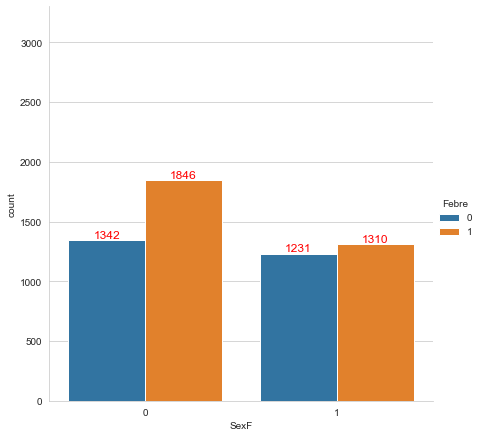

In [9]:
relp('sexf', 'febre')

AttributeError: 'NoneType' object has no attribute 'set_title'

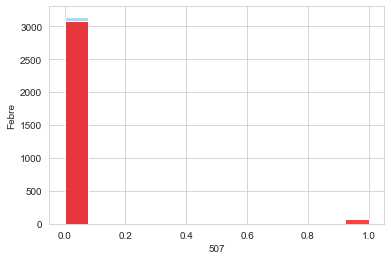

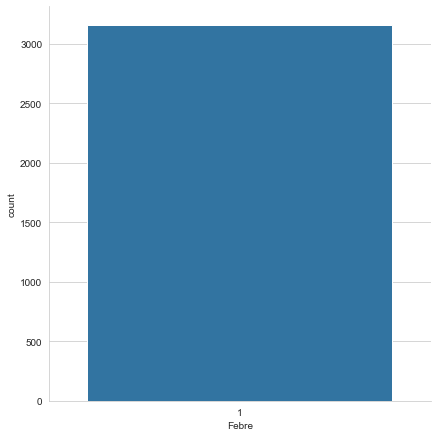

In [24]:
stats('febre')